In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(5)

In [2]:
#  model=tf.keras.models.load_model("original.h5")
# # model.summary()
# av1=np.random.randn(2000,128,3,1)
# av2=np.random.rand(500,128,3,1)
# av=np.concatenate((av1,av2))
# av_out=model.predict(av)
# # print(av_out)
# av.shape,av_out.shape
# av_class=np.argmax(av_out,axis=1)
# av_class
# np.unique(av_class)
# plt.hist(av_class)
# # av=np.random.randn(100,128,3,1)
# # av=np.random.rand(100,128,3,1)
# av_class
# t=np.arange(0,128)
# plt.plot(t,av2[0,:,0,0])

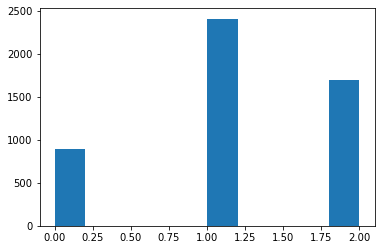

In [7]:
# np.random.seed(0)
model=tf.keras.models.load_model("original.h5")
av1=np.random.randn(5000,128,3,1)
av2=np.random.rand(1000,128,3,1)
av=np.concatenate((av1,av2))
av_out=model.predict(av1)
# print(av_out)
# av.shape,av_out.shape
av_class=np.argmax(av_out,axis=1)
# av_class
# np.unique(av_class)
plt.hist(av_class)
plt.show()

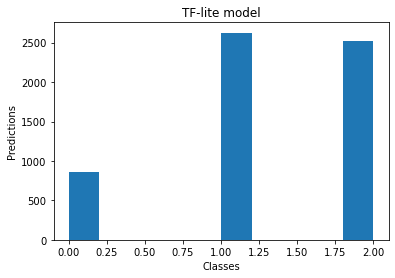

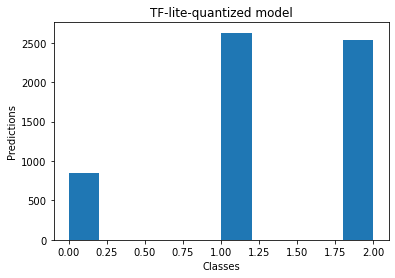

In [12]:
# Instantiate an interpreter for each model
gesture_model = tf.lite.Interpreter('model.tflite')
gesture_model_quantized = tf.lite.Interpreter('model_quantized.tflite')

# Allocate memory for each model
gesture_model.allocate_tensors()
gesture_model_quantized.allocate_tensors()

# Get indexes of the input and output tensors
gesture_model_input_index = gesture_model.get_input_details()[0]["index"]
gesture_model_output_index = gesture_model.get_output_details()[0]["index"]
gesture_model_quantized_input_index = gesture_model_quantized.get_input_details()[0]["index"]
gesture_model_quantized_output_index = \
gesture_model_quantized.get_output_details()[0]["index"]
# gesture_model_input_index,gesture_model_output_index
# Create arrays to store the results
gesture_model_predictions = []
gesture_model_quantized_predictions = []
av1=np.random.randn(5000,128,3,1)
av2=np.random.rand(1000,128,3,1)
x_test=np.concatenate((av1,av2))
# Run each model's interpreter for each value and store the results in arrays
for x_value in x_test:
#     print(len(x_value))
    # Create a 2D tensor wrapping the current x value
    x_value_tensor = tf.convert_to_tensor([x_value], dtype=np.float32)
#     print("answer2:::::::;;",x_value_tensor)
    # Write the value to the input tensor
    gesture_model.set_tensor(gesture_model_input_index, x_value_tensor)
    # Run inference
    gesture_model.invoke()
   # Read the prediction from the output tensor
    gesture_model_predictions.append(
    gesture_model.get_tensor(gesture_model_output_index)[0])
   # Do the same for the quantized model
    gesture_model_quantized.set_tensor(gesture_model_quantized_input_index, x_value_tensor)
    gesture_model_quantized.invoke()
    gesture_model_quantized_predictions.append(
    gesture_model_quantized.get_tensor(gesture_model_quantized_output_index)[0])
# print(gesture_model_predictions)
fig, ax = plt.subplots(1, 1)
avlite_class=np.argmax(gesture_model_predictions,axis=1)
ax.hist(avlite_class)
# Set title
ax.set_title("TF-lite model")
ax.set_xlabel('Classes')
ax.set_ylabel('Predictions')
plt.show()
avlitequantized_class=np.argmax(gesture_model_quantized_predictions,axis=1)
fig, ax = plt.subplots(1, 1)
plt.hist(avlitequantized_class)
ax.set_title("TF-lite-quantized model")
ax.set_xlabel('Classes')
ax.set_ylabel('Predictions')
plt.show()

